# Basic Car Speed 

## Problem Statement

We would like to determine the speed of a car based on the bumpiness and slope of the road. For this, we have a list of the speed from a list of drivers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("terrain.csv")

In [3]:
df.head()

,bumpiness,grade,target
0,0.639427,0.099355,0.0
1,0.025011,0.685680,0.0
2,0.275029,0.544466,0.0
3,0.223211,0.977843,1.0
4,0.736471,0.358674,1.0


In [4]:
X = df[["bumpiness","grade"]].values
y = df["target"]

In [5]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

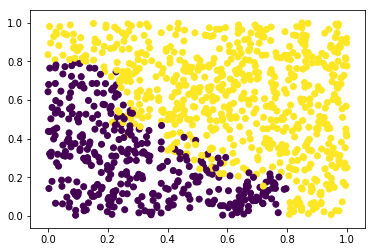

In [6]:
plt.scatter(df['bumpiness'],df['grade'],c=df['target'])

## Train Test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1) 

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

/home/eduardo/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Metrics

### Accuracy

In [9]:
from sklearn import metrics 
metrics.accuracy_score(y_test, y_pred) 

0.87

### Null Accuracy

In [10]:
max(y_test.mean(), 1 - y_test.mean()) 

0.64

### Cross Validation Logistic Regression

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()

/home/eduardo/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/eduardo/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/eduardo/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/eduardo/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/eduardo/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

0.919998349958749

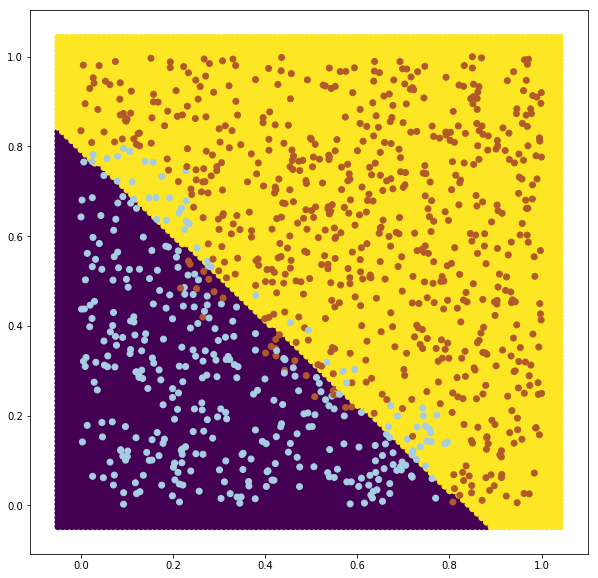

In [12]:
draw(clf,X,y,h=0.01)

## K Neighbors Classification

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

0.937983774594365

### GridSearch CV

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
grid=GridSearchCV(KNeighborsClassifier(),
                  param_grid={'n_neighbors':range(1,100),'weights':['distance','uniform']},
                  cv=5,
                  scoring='accuracy',
                  n_jobs=-1,
                  verbose=True)

In [17]:
grid.fit(X,y)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 990 out of 990 | elapsed:   11.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(1, 100), 'weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

In [18]:
knn_final = grid.best_estimator_
knn_final

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=16, p=2,
           weights='uniform')

In [19]:
grid.best_params_

{'n_neighbors': 16, 'weights': 'uniform'}

In [20]:
grid.best_score_

0.957

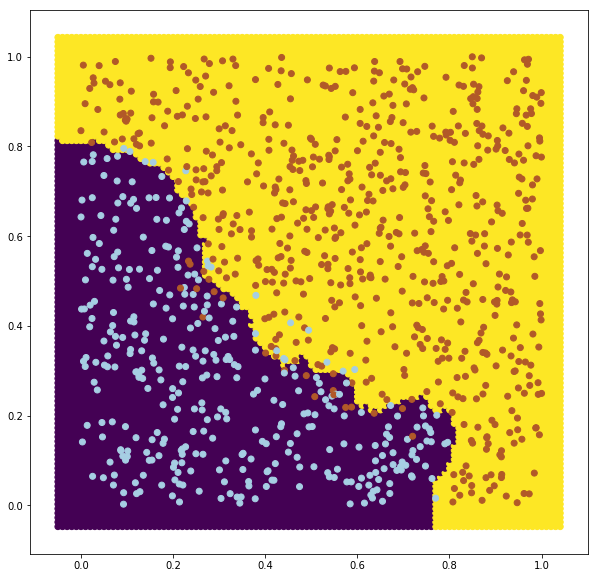

In [21]:
draw(knn_final,X,y,h=0.01)

In [22]:
# Best Estimator
y_pred = knn_final.predict(X_test)

## Confusion Matrix 

In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report
confusion_matrix(y_test,y_pred) 

array([[31,  5],
       [ 4, 60]])

Confusion matrix, without normalization
[[31  5]
 [ 4 60]]


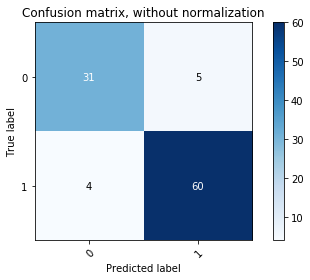

In [24]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Only use the labels that appear in the data
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['0','1'],
                      title='Confusion matrix, without normalization')

In [25]:
import seaborn as sns

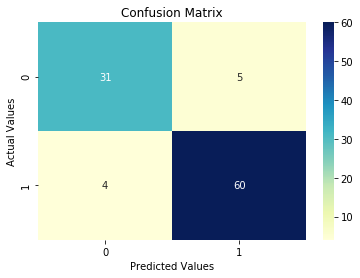

In [26]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred) , annot=True, fmt="d",cmap="YlGnBu")
ax.set(xlabel='Predicted Values', ylabel='Actual Values',title='Confusion Matrix');

In [27]:
precision_score(y_test,y_pred)

0.9230769230769231

In [28]:
recall_score(y_test,y_pred)

0.9375

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87        36
         1.0       0.92      0.94      0.93        64

   micro avg       0.91      0.91      0.91       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



In [30]:
cross_val_score(knn_final, X, y, cv=5, scoring='precision').mean()

0.9719982886917148

In [31]:
cross_val_score(knn_final, X, y, cv=5, scoring='recall').mean()

0.961371496720334

## Support Vector Machine SVM

In [32]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=10)
cross_val_score(svm,X,y,cv=3,scoring='accuracy').mean()

0.923009402880985

### GridSearch CV SVM kernel poli grados [2 3 4 5] C= 1...10000

In [33]:
grid=GridSearchCV(SVC(),
                  param_grid={'kernel':['poly'],'C':range(1,10001,10),'degree':range(2,6)},
                  cv=5,
                  scoring='accuracy',
                  n_jobs=-1,
                  verbose=True)

In [34]:
grid.fit(X,y)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 3388 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 6188 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 9788 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 14188 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 19388 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 20000 out of 20000 | elapsed:  2.1min finished
/home/eduardo/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['poly'], 'C': range(1, 10001, 10), 'degree': range(2, 6)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

In [35]:
svm_final = grid.best_estimator_
svm_final

SVC(C=8511, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
grid.best_params_

{'C': 8511, 'degree': 4, 'kernel': 'poly'}

In [37]:
grid.best_score_

0.949

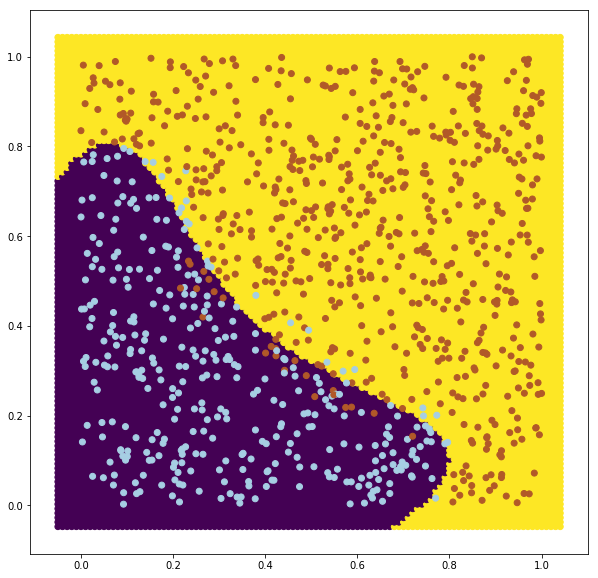

In [38]:
draw(svm_final,X,y,h=0.01)

## Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(DecisionTreeClassifier(),
                  param_grid={'max_depth':range(1,20),'min_samples_leaf':range(20,100),'min_samples_split':range(20,50)},
                  cv=6,
                  scoring='accuracy',
                  n_jobs=-1,
                  verbose=True)


In [113]:
grid.fit(X,y)

Fitting 6 folds for each of 45600 candidates, totalling 273600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 13180 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 33680 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 62380 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 99280 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 144380 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 197680 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 259180 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 273600 out of 273600 | elapsed:  4.5min finished


GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 20), 'min_samples_leaf': range(20, 100), 'min_samples_split': range(20, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

In [115]:
tree_final = grid.best_estimator_
tree_final

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [116]:
grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 20}

In [117]:
grid.best_score_

0.944

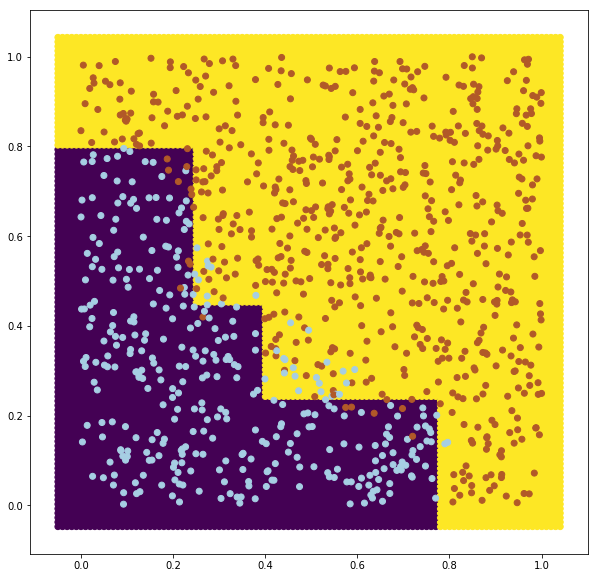

In [118]:
draw(tree_final,X,y,h=0.01)

## ROC curve AUC Area Under Curve

#### ROC CURVE

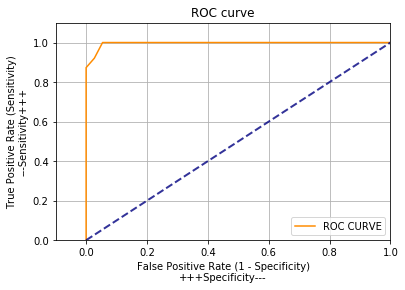

In [129]:
y_pred= tree_final.predict(X_test)
y_pred_prob = tree_final.predict_proba(X_test) 

# ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr, tpr, label = 'ROC CURVE',color='darkorange')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.1])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)\n+++Specificity---')
plt.ylabel('True Positive Rate (Sensitivity)\n---Sensitivity+++')
plt.legend()
plt.grid(True)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='navy',label='Chance', alpha=.8)

#### AUC

In [127]:
from sklearn import metrics 
metrics.roc_auc_score(y_test, y_pred_prob[:,1])

0.9961389961389963

## Saving and delivering a model

In [130]:
import pickle

In [132]:
pickle.dump(tree_final,open('model.pickle','wb'))
model_loaded = pickle.load(open('model.pickle','rb'))

In [133]:
model_loaded

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')